# Logistic Regression.


## Import required packages.

In [1]:
# !pip install mord

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mord import LogisticIT

import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline
import matplotlib.pylab as plt

## Data exploration, cleaning, and preprocessing.

In [3]:
# Create data frame for UniversalBank data set.
bank_df = pd.read_csv('UniversalBank.csv')

# Display the first 10 records of bank_df data frame.
print(bank_df.head(10))

# Identify variable types.
bank_df.dtypes

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
# Drop (remove)'ID' and 'ZIP Code' variables which are
# not relevant for model building.
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

# Replace two-words variable names with one-word using '_'.
bank_df.columns = [s.strip().replace(' ', '_') for s in bank_df.columns]

# Treat 'Education' as categorical variable with three categories:
# 1 = Undergrad, 2 = Graduate,and 3 = Advanced/Professional.
bank_df['Education'] = bank_df['Education'].astype('category')

bank_df['Education'] = bank_df['Education'].cat.rename_categories({1:'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})

# Convert 'Education' categorical variable to dummy variables.
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True)

# Display updated columns.
print(bank_df.columns)

bank_df.head()

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'Education_Graduate', 'Education_Advanced/Professional'],
      dtype='object')


,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


## Develop and run logistic regression for Universal Bank data using single predictor.

In [5]:
# Apply single predictor 'Income' and outcome 'Personal_Loan' 
# for single predictor logistic model.
predictors = ['Income']
outcome = 'Personal_Loan'

# Create predictor X and outcome y variables.  
X = bank_df[predictors]
y = bank_df[outcome]

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit single predictor logistic 
# model for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg_single = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg_single.fit(train_X, train_y)

# Display intercept and coefficients of the single predictor logistic
# model.
print('Parameters of Single Predictor Logistic Regression Model')
print('Intercept:', np.round(log_reg_single.intercept_[0], decimals=3))
print(pd.DataFrame({'Coefficient:': np.round(log_reg_single.coef_[0], decimals=3)}, 
                   index=X.columns).transpose())
# logit = -6.049 + 0.036*Income

Parameters of Single Predictor Logistic Regression Model
Intercept: -6.049
              Income
Coefficient:   0.036


In [6]:
# Make predictions for validation set using single
# predictor logistic model. 

# Predict single logistic model's results (0 or 1)
# for validation set.
log_pred_single = log_reg_single.predict(valid_X)


# Predict single logistic model's probabilities p(0)
# and p(1) for validation set.
log_prob_single = np.round(log_reg_single.predict_proba(valid_X), 
                           decimals=4)

# Create data frame to display simple logistic regression
# resuts for validation set. 
log_result_single = pd.DataFrame({'Actual': valid_y, 
                        'Classification': log_pred_single,     
                        'p(0)': [p[0] for p in log_prob_single],
                        'p(1)': [p[1] for p in log_prob_single],
                        })
print('Classification for Validation Partition')
print(log_result_single.head(20))


Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
2764       0               0  0.9524  0.0476
4767       0               0  0.9880  0.0120
3814       0               0  0.9916  0.0084
3499       0               0  0.8706  0.1294
2735       0               0  0.9708  0.0292
3922       0               0  0.9951  0.0049
2701       0               0  0.9829  0.0171
1179       0               0  0.9232  0.0768
932        0               0  0.8785  0.1215
792        0               0  0.9232  0.0768
1852       0               0  0.9835  0.0165
1185       0               0  0.9928  0.0072
1724       0               0  0.9944  0.0056
4080       0               0  0.9900  0.0100
3823       0               0  0.9885  0.0115
4054       0               0  0.9764  0.0236
2721       1               1  0.4407  0.5593
3903       0               0  0.9756  0.0244
1865       0               0  0.9415  0.0585
759        0               0  0.9803  0.0197


In [7]:
## Display four different cases from validation set.
interestingCases = [2764, 932, 2721, 702]
print('Predictions for Specific Records in Validation Set')
print(log_result_single.loc[interestingCases])

Predictions for Specific Records in Validation Set
      Actual  Classification    p(0)    p(1)
2764       0               0  0.9524  0.0476
932        0               0  0.8785  0.1215
2721       1               1  0.4407  0.5593
702        1               0  0.8897  0.1103


In [8]:
# Confusion matrices for single predictor logistic model. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg_single.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg_single.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9080)

       Prediction
Actual    0    1
     0 2632   81
     1  195   92

Validation Partition
Confusion Matrix (Accuracy 0.9110)

       Prediction
Actual    0    1
     0 1763   44
     1  134   59


## Develop and run logistic regression for Universal Bank data using multiple predictors.

In [9]:
# Create predictors X and outcome y variables.
X = bank_df.drop(columns=['Personal_Loan'])
y = bank_df['Personal_Loan']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -12.105
Coefficients for Predictors
          Age  Experience  Income  Family  CCAvg  Mortgage  \
Coeff: -0.052       0.053   0.059    0.61   0.24     0.001   

        Securities_Account  CD_Account  Online  CreditCard  \
Coeff:               -1.03       3.648  -0.679      -0.961   

        Education_Graduate  Education_Advanced/Professional  
Coeff:               4.199                            4.359  


In [10]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
2764       0               0  0.9759  0.0241
4767       0               0  0.9999  0.0001
3814       0               0  0.9999  0.0001
3499       0               0  0.9984  0.0016
2735       0               0  0.9562  0.0438
3922       0               0  0.9975  0.0025
2701       0               0  0.9962  0.0038
1179       0               0  0.9588  0.0412
932        0               1  0.3319  0.6681
792        0               0  0.9344  0.0656
1852       0               0  0.9465  0.0535
1185       0               0  0.9999  0.0001
1724       0               0  0.9986  0.0014
4080       0               0  0.9988  0.0012
3823       0               0  0.9874  0.0126
4054       0               0  0.9988  0.0012
2721       1               1  0.0315  0.9685
3903       0               0  0.9999  0.0001
1865       0               0  0.8972  0.1028
759        0               0  0.9910  0.0090


In [11]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9607)

       Prediction
Actual    0    1
     0 2685   28
     1   90  197

Validation Partition
Confusion Matrix (Accuracy 0.9595)

       Prediction
Actual    0    1
     0 1791   16
     1   65  128


In [12]:
# Make classification for new Universal Bank data using 
# multiple predictor logistics regression model. 

# Consider dataframe new_data with 3 new records, for 
# which classification of 'Personal Loan' is required. 
# Notice that the 'Personal Loan' outcome variable is 
# not present in these records. 
new_data = pd.DataFrame({
            'Age': [0, 0, 0],  
            'Experience': [0, 0, 0],
            'Income': [115, 122, 84],
            'Family': [1, 4, 2],  
            'CCAvg': [0, 0, 0],
            'Mortgage': [0, 0, 0],
            'Securities_Account': [0, 0, 0],  
            'CD_Account': [0, 0, 0],  
            'Online': [0, 1, 1],  
            'CreditCard': [0, 0, 0],
            'Education_Graduate': [0, 0, 1],
            'Education_Advanced/Professional': [1, 0, 0] 
})

# Make classifications for new Universal Bank data.
pred_new_data = log_reg.predict(new_data)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for new Universal Bank data.
pred_new_prob = np.round(log_reg.predict_proba(new_data),
                    decimals = 4)

# Display new Universal Bank data and classifications 
# for new data.
pred_new_result = pd.DataFrame({
            'Age': [0, 0, 0],  
            'Experience': [0, 0, 0],
            'Income': [115, 124, 84],
            'Family': [1, 4, 2],  
            'CCAvg': [0, 0, 0],
            'Mortgage': [0, 0, 0],
            'Securities_Account': [0, 0, 0],  
            'CD_Account': [0, 0, 0],  
            'Online': [0, 1, 1],  
            'CreditCard': [0, 0, 0],
            'Education_Graduate': [0, 0, 1],
            'Education_Advanced/Professional': [1, 0, 0], 
            'Classification': pred_new_data,
            'p(0)': [p[0] for p in pred_new_prob],
            'p(1)': [p[1] for p in pred_new_prob],
            
})
print()
print('Classification for Personal Loan using New Data')
print(pred_new_result)


Classification for Personal Loan using New Data
   Age  Experience  Income  Family  CCAvg  Mortgage  Securities_Account  \
0    0           0     115       1      0         0                   0   
1    0           0     124       4      0         0                   0   
2    0           0      84       2      0         0                   0   

   CD_Account  Online  CreditCard  Education_Graduate  \
0           0       0           0                   0   
1           0       1           0                   0   
2           0       1           0                   1   

   Education_Advanced/Professional  Classification    p(0)    p(1)  
0                                1               0  0.5961  0.4039  
1                                0               0  0.9604  0.0396  
2                                0               0  0.9196  0.0804  


## Create and display Gains chart and Lift chart for Unviersal Bank validation partition. 

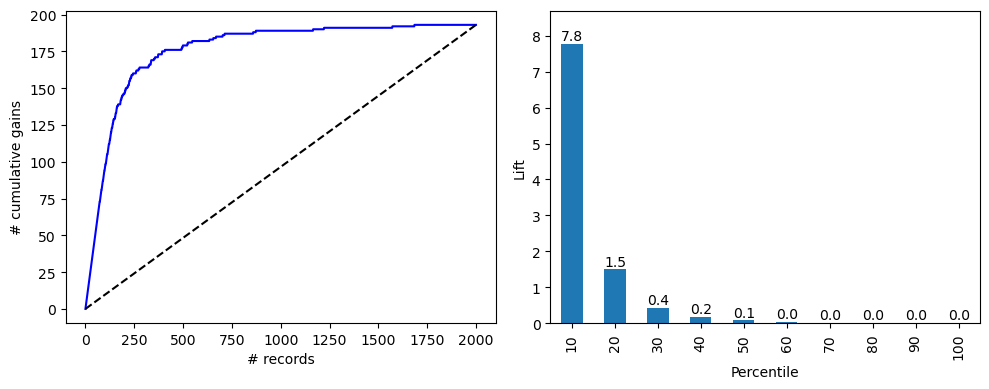

In [13]:
# Develop and display Gains chart and Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(1)'], ascending=False)

# Create a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
# In the Gains chart, the 'lift' over the base curve 
# indicates for a given number of cases (on x-axis), 
# the additional responders that you can identify 
# by using the logistic regression model.
gainsChart(df.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 1's' 
# yields 7.8 times as many 1's as would simply selecting 
# 10% of the records at random.
liftChart(df['p(1)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()

## Develop and run logistic regression for Universal Bank data using statsmodels library.  

In [14]:
# Same initial preprocessing and creating dummies.

# Create a data frame for statsmodels package. 
bank_df_sm = bank_df 

# Add constant column.
bank_df_sm = sm.add_constant(bank_df_sm, prepend=True)

# Create predictors X and output variable y.   
X = bank_df_sm.drop(columns=['Personal_Loan'])
y = bank_df_sm['Personal_Loan']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Use GLM (generalized linear model) with the binomial family 
# to fit a logistic regression.
log_reg_sm = sm.GLM(train_y, train_X, family=sm.families.Binomial())
log_result_sm = log_reg_sm.fit()
print(log_result_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Personal_Loan   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2987
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.15
Date:                Mon, 15 Apr 2024   Deviance:                       680.30
Time:                        18:28:31   Pearson chi2:                 8.10e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3325
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [15]:
# Remove 3 predcitor variables ('Age', 'Experience', and
# 'Mortgage'), and rerun the logistic regression model
# using GLM algorithm. 

# Create predictors X and output variable y.   
X = bank_df_sm.drop(columns=['Personal_Loan','Age','Experience','Mortgage'])
y = bank_df_sm['Personal_Loan']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Use GLM (general linear model) with the binomial family to fit a logistic regression.
log_reg_sm = sm.GLM(train_y, train_X, family=sm.families.Binomial())
log_result_sm = log_reg_sm.fit()
print(log_result_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Personal_Loan   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2990
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -341.09
Date:                Mon, 15 Apr 2024   Deviance:                       682.18
Time:                        18:28:31   Pearson chi2:                 7.61e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3320
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Logistic regression for multi-class classification for car accidents (accidentsnn.csv). 

In [16]:
# Create data frame for accidentsnn data set.
# Display the first 10 records of the data set. 
# ALCHL_I - Alcohol involvement (1) or 
#           noninvolvement (2) in accident.
# PROFIL_I_R - Profile of the roadway: level (1), 
#              other (0). 
# SUR_COND – Surface condition of the road: dry (1), 
#            wet (2), snow/slush (3), ice (4), 
#            unknown (9).
# VEH_INVL – Number of vehicles involved.
# MAX_SEV_IR – Severity of accident: no injury (0), 
#              nonfatal injury (1), fatality (2).
accident_df = pd.read_csv('accidentsnn.csv')
print(accident_df.head(10))

# Display dimensions (rows and columns) of data frame.
print()
print('Number of rows and Columns in Data Set')
print(accident_df.shape)

# Identify variable types.
print()
print('Data Types in Columns')
print(accident_df.dtypes)

   ALCHL_I  PROFIL_I_R  SUR_COND  VEH_INVL  MAX_SEV_IR
0        2           0         1         1           0
1        2           1         1         1           2
2        1           0         1         1           0
3        2           0         2         2           1
4        2           1         1         2           1
5        2           0         1         1           0
6        2           0         2         1           2
7        2           1         2         1           1
8        2           1         1         1           1
9        2           0         1         1           0

Number of rows and Columns in Data Set
(999, 5)

Data Types in Columns
ALCHL_I       int64
PROFIL_I_R    int64
SUR_COND      int64
VEH_INVL      int64
MAX_SEV_IR    int64
dtype: object


In [17]:
# Remove for SUR_COND (surface condition) the class 
# unknown = 9. For that, convert SUR_COND into categorical variable. 
accident_df.SUR_COND = accident_df.SUR_COND.astype('category')

# Convert the categorical data into dummy variables
# exclude the column for SUR_COND_9 (unknown = 9).
# Create updated accident_upd data frame.
accident_upd = pd.get_dummies(accident_df, 
            columns=['SUR_COND']).drop(columns=['SUR_COND_9'])

# Display the first 10 records of accident_upd data frame.
print()
print('First 10 records of Updated Accidents Data Set')
print(accident_upd.head(10))
print(accident_upd.columns)


First 10 records of Updated Accidents Data Set
   ALCHL_I  PROFIL_I_R  VEH_INVL  MAX_SEV_IR  SUR_COND_1  SUR_COND_2  \
0        2           0         1           0           1           0   
1        2           1         1           2           1           0   
2        1           0         1           0           1           0   
3        2           0         2           1           0           1   
4        2           1         2           1           1           0   
5        2           0         1           0           1           0   
6        2           0         1           2           0           1   
7        2           1         1           1           0           1   
8        2           1         1           1           1           0   
9        2           0         1           0           1           0   

   SUR_COND_3  SUR_COND_4  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0      

In [18]:
# Identify outcome for car accidents. The outcome variable 
# is 'MAX_SEV_IR' - maximum severity from an accident:
# 0 = No Injury, 1 = Nonfatal Injury, 2 = Fatality. 
# It is a multi-class outcome variable with 3 classes.
outcome = 'MAX_SEV_IR'

# Identify predictors for car accidents. 
predictors = ['ALCHL_I', 'PROFIL_I_R', 'SUR_COND_1','SUR_COND_2', 
              'SUR_COND_3', 'SUR_COND_4','VEH_INVL']

# Create outcome (y) and predictor (X) variables. 
y = accident_upd[outcome]
X = accident_upd[predictors]

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the accidents_upd data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)


In [19]:
# Develop and display ordinal logistic model. 

# Change np.int to int in the latest update of NumPy.
np.int = int

# Utilize LogisticIT() function from mord library to 
# develop ordinal logistic regression. alpha = 0 
# means no regularizaiton in this function. 
logit_ord = LogisticIT(alpha=0)
logit_ord.fit(train_X, train_y)

# Display intercept (logit_ord.theta) and coefficients of
# the ordinal logistic regression (logit_ord.coef_). 
print('Ordinal Logistic Regression')
print('  Intercepts', np.round(logit_ord.theta_, decimals=3))
print('  Coefficients', np.round(logit_ord.coef_, decimals=3))
print()

# Classify ordinal logistic outcomes results_ord and 
# probabilities prob_ord for validation partition, 
# i.e., p(0), p(1), and p(2) for car accidents data set.
results_ord = logit_ord.predict(valid_X)
prob_ord = np.round(logit_ord.predict_proba(valid_X), decimals=4)

# Create data frame to show ordinal logistic
# model resuts for car accidents data set.
print()
print('Classification for First 10 Records in Validation Data Set')
results_ord = pd.DataFrame({
    'Actual': valid_y, 'Classification': results_ord,
    'P(0)': [p[0] for p in prob_ord],
    'P(1)': [p[1] for p in prob_ord],
    'P(2)': [p[2] for p in prob_ord],
})

# Display 10 top records with actual classes and classification 
# results, and respective probabilities. 
print(results_ord.head(10))

Ordinal Logistic Regression
  Intercepts [-3.217 -1.54 ]
  Coefficients [-1.253  2.106 -3.405 -1.874 -1.733 -1.533  0.821]


Classification for First 10 Records in Validation Data Set
     Actual  Classification    P(0)    P(1)    P(2)
507       2               1  0.2866  0.3959  0.3175
608       2               0  0.7408  0.1978  0.0614
452       1               0  0.5844  0.2983  0.1173
368       1               1  0.2138  0.3789  0.4073
242       1               0  0.5844  0.2983  0.1173
928       0               0  0.8666  0.1054  0.0280
262       0               0  0.8666  0.1054  0.0280
809       0               0  0.8666  0.1054  0.0280
318       2               1  0.3560  0.3913  0.2527
49        1               1  0.1843  0.3630  0.4527


In [20]:
# Identify and display confusion matrix for training partition. 
print('Training Partition for Ordinal Logistic Model')
classificationSummary(train_y, logit_ord.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Ordinal Logistic Model')
classificationSummary(valid_y, logit_ord.predict(valid_X))

Training Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.7679)

       Prediction
Actual   0   1   2
     0 331   1   0
     1  13 117  50
     2  35  40  12

Validation Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.7625)

       Prediction
Actual   0   1   2
     0 219   0   0
     1  19  78  22
     2  29  25   8


In [21]:
# Develop and display nominal logistic model for
# car accidents data set.

# Utilize LogisticRegression() function to 
# develop nominal logistic regression. 
# 'liblinear' algorithm for solver does not support 
# 'multinominal' class. Instead, the 'lbfgs' algorithm
# is used, which supports 'multinominal' class.
logit_nom = LogisticRegression(penalty="l2", solver='lbfgs', 
               max_iter=3000, C=1e24, multi_class='multinomial')
logit_nom.fit(train_X, train_y)

# Display intercept (logit_nom.interpcept_) and coefficients of
# the nominal logistic regression (logit_nom.coef_). 
print()
print('Nominal Logistic Regression')
print('  Intercepts', np.round(logit_nom.intercept_, decimals=3))
print('  Coefficients', np.round(logit_nom.coef_, decimals=3))
print()

# Classify nominal logistic outcomes results_nom and 
# probabilities prob_nom for validation partition, 
# i.e., p(0), p(1), and p(2) for car accidents data set.
results_nom = logit_nom.predict(valid_X)
prob_nom = np.round(logit_nom.predict_proba(valid_X), decimals = 4)

# Create data frame to show nominal logistic
# model resuts for car accidents data set. 
print()
print('Classification for First 10 Records in Validation Data Set')
results_nom = pd.DataFrame({
    'Actual': valid_y, 'Classification': results_nom,
    'P(0)': [p[0] for p in prob_nom],
    'P(1)': [p[1] for p in prob_nom],
    'P(2)': [p[2] for p in prob_nom],
})

# Display 10 top records with actual classes and classification 
# results, and respective probabilities.  
print(results_nom.head(10))



Nominal Logistic Regression
  Intercepts [ 13.495 -28.245  14.75 ]
  Coefficients [[  0.917 -47.324 -10.369 -27.288 -19.74  -30.048  -2.047]
 [  0.164  25.005  24.272  34.543  30.571  36.027   1.157]
 [ -1.081  22.319 -13.903  -7.255 -10.831  -5.979   0.89 ]]


Classification for First 10 Records in Validation Data Set
     Actual  Classification    P(0)    P(1)    P(2)
507       2               1  0.0000  0.5779  0.4221
608       2               0  0.5614  0.0624  0.3762
452       1               1  0.0000  0.8263  0.1737
368       1               1  0.0000  0.8902  0.1098
242       1               1  0.0000  0.8263  0.1737
928       0               0  0.9615  0.0043  0.0342
262       0               0  0.9615  0.0043  0.0342
809       0               0  0.9615  0.0043  0.0342
318       2               2  0.0033  0.2196  0.7771
49        1               2  0.0000  0.3492  0.6508


In [22]:
# Identify and display confusion matrix for training partition. 
print('Training Partition for Nominal Logistic Model')
classificationSummary(train_y, logit_nom.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Nominal Logistic Model')
classificationSummary(valid_y, logit_nom.predict(valid_X))

Training Partition for Nominal Logistic Model
Confusion Matrix (Accuracy 0.8731)

       Prediction
Actual   0   1   2
     0 331   0   1
     1   0 172   8
     2  30  37  20

Validation Partition for Nominal Logistic Model
Confusion Matrix (Accuracy 0.8650)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 116   3
     2  24  26  12
